**Importing necessary packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import mapclassify as mc

**Data Sourcing**

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv')

In [5]:
data.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


**The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.**

In [6]:
plant_based = ['Wheat and Wheat Products','Rice','Soybeans','Nuts inc. Peanut Butter']
data['food_type'] = np.where(data['food_category'].isin(plant_based),'Plant_Based','Animal_Based')
ea_df = data.query("country == ['Kenya','Uganda','Tanzania','Rwanda','Ethiopia']")
df_emm = ea_df.groupby(['food_category','food_type'])[['co2_emmission']].mean().sort_values(by='co2_emmission').reset_index()
df_emm

,food_category,food_type,co2_emmission
0,Soybeans,Plant_Based,0.236
1,Eggs,Animal_Based,0.718
2,Poultry,Animal_Based,1.250
3,Pork,Animal_Based,3.370
4,Wheat and Wheat Products,Plant_Based,3.940
5,Nuts inc. Peanut Butter,Plant_Based,4.650
6,Fish,Animal_Based,8.428
7,Rice,Plant_Based,12.680
8,Lamb & Goat,Animal_Based,55.262
9,Milk - inc. cheese,Animal_Based,63.754


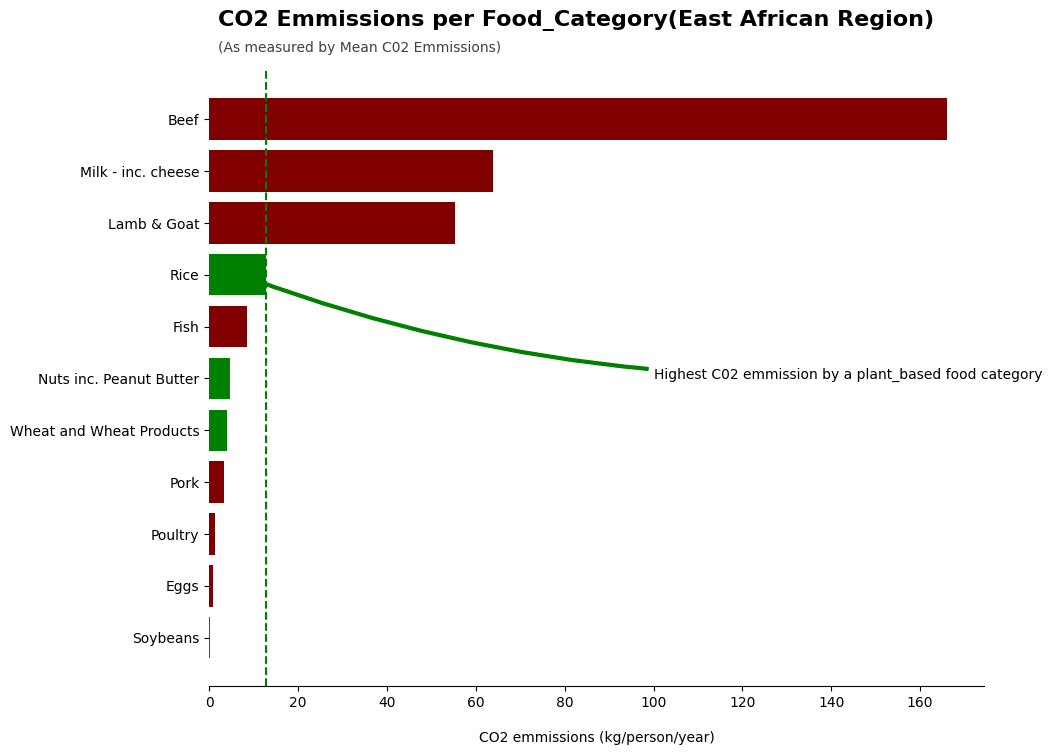

In [7]:
plt.figure(figsize=(10,8))
colors = ['maroon' if word == 'Animal_Based' else 'green' for word in df_emm.food_type]
y_pos = np.arange(len(df_emm['co2_emmission']))
ax = plt.barh(df_emm['food_category'],width = df_emm.co2_emmission,color = colors)
sns.despine(left=True,top=True,right=True)
ynew = df_emm.query("food_category == 'Rice'")['co2_emmission'].iloc[0]
plt.xlabel('CO2 emmissions (kg/person/year)',labelpad=15)
plt.axvline(ynew,linestyle = '--',color='green')
plt.annotate('Highest C02 emmission by a plant_based food category',xy=(7,7),xytext=(100,5),arrowprops={'arrowstyle':'simple','color':'green','connectionstyle':"arc3,rad=-0.1"})
plt.text(x=2, y=11.8, s='CO2 Emmissions per Food_Category(East African Region)', fontsize=16, weight='bold')
plt.text(x=2, y=11.3, s='(As measured by Mean C02 Emmissions)', fontsize=10, alpha=0.75)
plt.savefig('CO2_EmmissionsEA.png')

*   From the visualization above, it's clear that the Top 3 food categories are all Animal_Based.
*   Furthermore, the highest emmissions by a plant_based food category (Rice) accounts to about a tenth of Beef!!!

This clearly highlights the vast difference in contributions between Plant_based and Animal_based food categories, especially beef.



**Highlighting the marked difference between consumption and emissions in the various food categories**

In [8]:
diff = data.groupby('food_category')[['consumption','co2_emmission']].sum().sort_values(by='co2_emmission',ascending=False).reset_index()
diff

,food_category,consumption,co2_emmission
0,Beef,1576.04,48633.26
1,Milk - inc. cheese,16350.71,23290.00
2,Lamb & Goat,338.02,11837.38
3,Pork,2096.08,7419.11
4,Rice,3818.77,4886.91
5,Fish,2247.32,3588.22
6,Poultry,2758.50,2963.16
7,Wheat and Wheat Products,9301.44,1773.78
8,Eggs,1061.29,974.95
9,Nuts inc. Peanut Butter,537.84,951.99


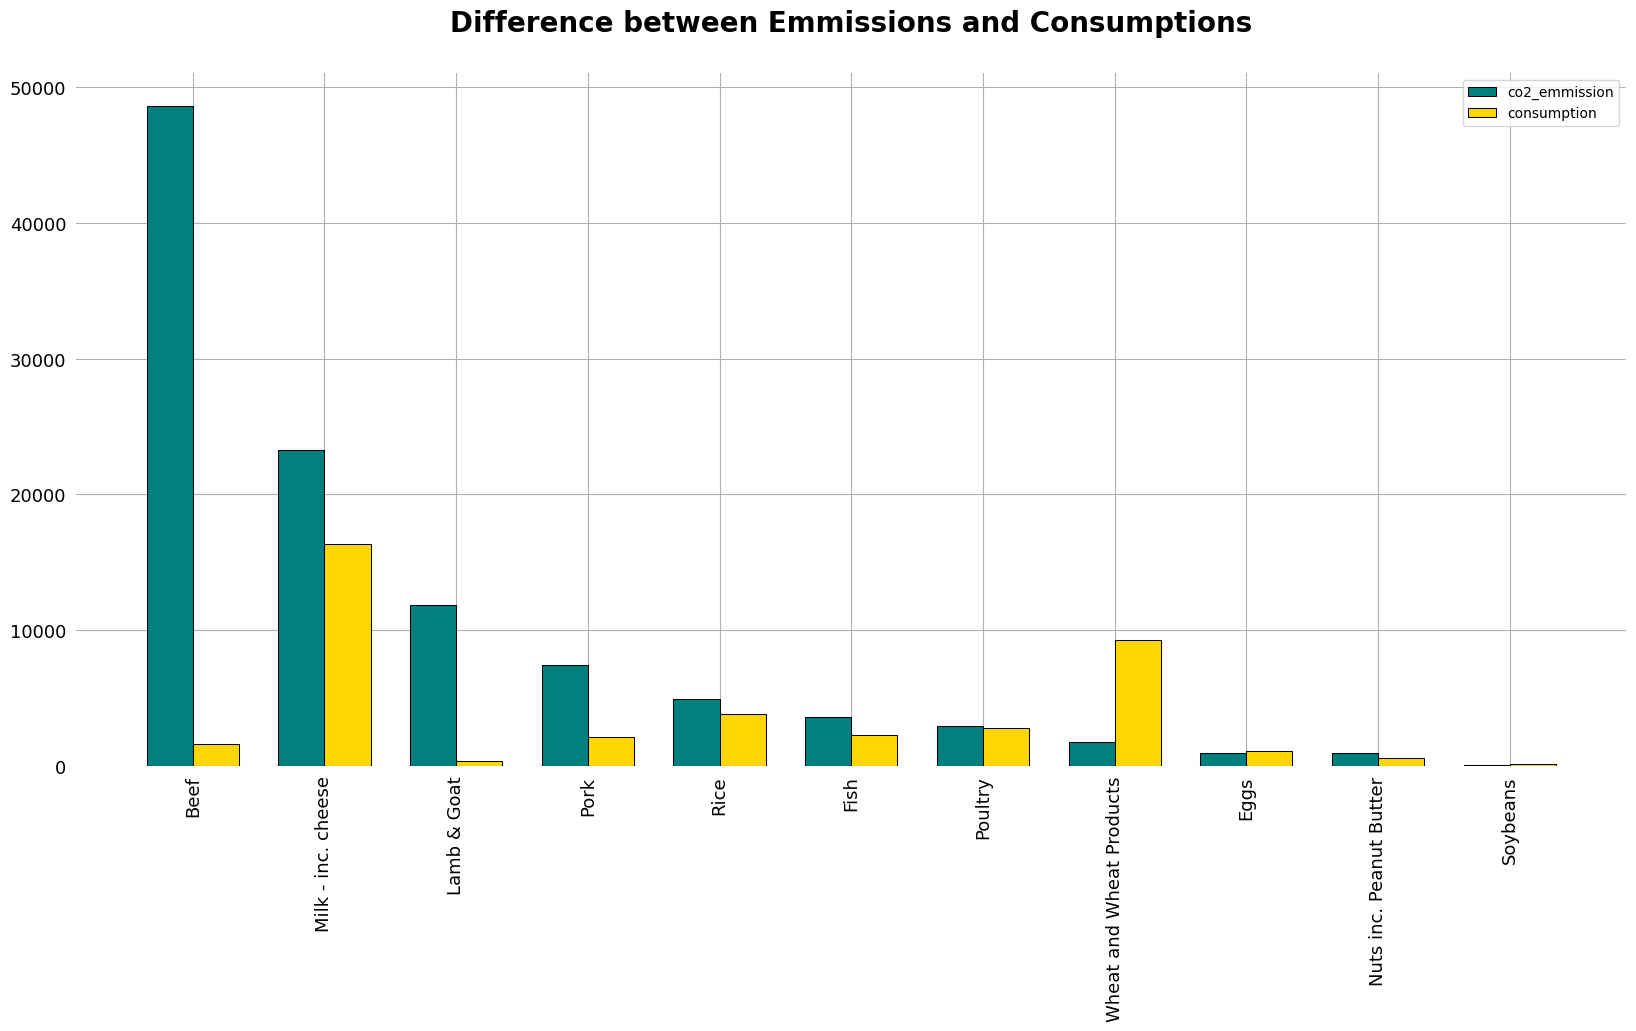

In [9]:
fig,ax = plt.subplots(figsize=(20,9))

width = 0.35
sort_order = diff["food_category"].to_list()

sns.despine(top=True,right=True,bottom=True,left=True)
plt.grid(visible=True)

height_con = diff['consumption']
height_emm = diff['co2_emmission']
X = np.arange(len(height_emm))

plt.bar(X, height_emm, ec = "black", lw = .75,color = "teal",zorder = 3, width = width,label = "co2_emmission")
plt.bar(X + width, height_con, ec = "black", lw = .75,color = "gold",zorder = 3, width = width,label = "consumption")

ax.set_xticks(ticks= X + width/2, labels=sort_order, rotation=90)
plt.tick_params(axis='both',labelsize=13,direction='out',left=False,bottom=False)

plt.legend()
plt.title('Difference between Emmissions and Consumptions',fontsize=20,fontweight='bold',pad=30)
plt.savefig('Emmissions vs Consumptions.png')

In [ ]:
data['food_type']

0       Animal_Based
1       Animal_Based
2       Animal_Based
3       Animal_Based
4       Animal_Based
            ...     
1425    Animal_Based
1426     Plant_Based
1427     Plant_Based
1428     Plant_Based
1429     Plant_Based
Name: food_type, Length: 1430, dtype: object

**The food consumption of animal and non-animal products and the impact on carbon footprint**

In [10]:
df_cons = data.groupby(['food_category','food_type'])[['consumption']].mean().sort_values(by='consumption').reset_index()
df_cons

,food_category,food_type,consumption
0,Soybeans,Plant_Based,0.860538
1,Lamb & Goat,Animal_Based,2.600154
2,Nuts inc. Peanut Butter,Plant_Based,4.137231
3,Eggs,Animal_Based,8.163769
4,Beef,Animal_Based,12.123385
5,Pork,Animal_Based,16.123692
6,Fish,Animal_Based,17.287077
7,Poultry,Animal_Based,21.219231
8,Rice,Plant_Based,29.375154
9,Wheat and Wheat Products,Plant_Based,71.549538


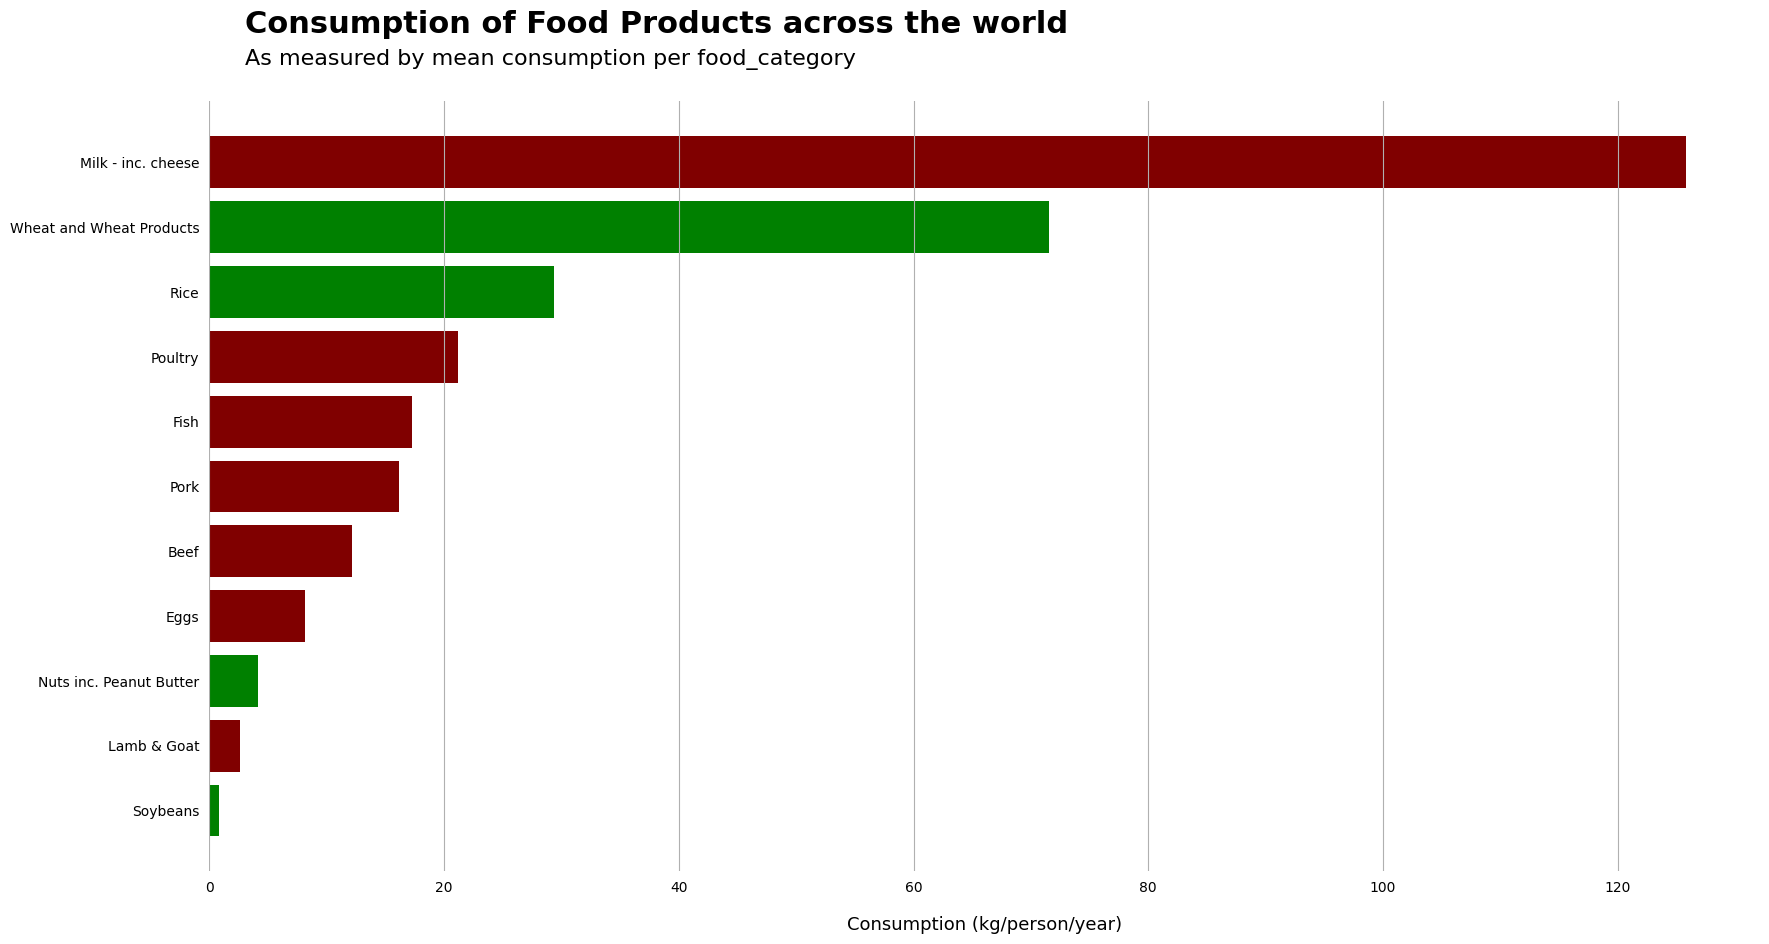

In [11]:
plt.figure(figsize=(20,10))
colors = ['maroon' if word == 'Animal_Based' else 'green' for word in df_cons.food_type]
plt.barh(df_cons['food_category'],df_cons['consumption'],color=colors)
sns.despine(top=True,right=True,bottom=True,left=True)
plt.tick_params(left=False,bottom=False)
plt.grid(axis='x')
plt.text(x=3,y=12,s='Consumption of Food Products across the world',weight='bold',fontsize=22)
plt.text(x=3,y=11.5,s='As measured by mean consumption per food_category',fontsize=16)
plt.xlabel('Consumption (kg/person/year)',labelpad=15,fontsize=13)
plt.savefig('consumption.png')

Milk n cheese products top in consumption with Rice and Wheat and wheat products accounting for the most consumed plant_based categories.

**Beef's contribution to CO2 emissions (kg/person/year)**

In [12]:
beef_df = data.query('food_category == "Beef"')[['country','co2_emmission']]
beef_df

,country,co2_emmission
2,Argentina,1712.00
13,Australia,1044.85
24,Albania,694.30
35,Iceland,412.26
46,New Zealand,693.99
...,...,...
1377,Sierra Leone,61.41
1388,Sri Lanka,42.58
1399,Indonesia,79.92
1410,Liberia,24.07


In [14]:
# pip install geopandas

In [16]:
# pip install geoplot

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-18-1902369eb8ba>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [19]:
world.rename(columns={'name':'country'},inplace=True)
world.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [20]:
beef_df = pd.merge(world,beef_df,on='country',how='outer')
beef_df

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,co2_emmission
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",276.49
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",187.92
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",933.45
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN
...,...,...,...,...,...,...,...
186,NaN,NaN,Bosnia and Herzegovina,NaN,NaN,None,281.42
187,NaN,NaN,Macedonia,NaN,NaN,None,237.30
188,NaN,NaN,Mauritius,NaN,NaN,None,184.84
189,NaN,NaN,Grenada,NaN,NaN,None,106.77


In [21]:
beef_df = beef_df.drop(['pop_est','continent','iso_a3','gdp_md_est'],axis=1)
beef_df

,country,geometry,co2_emmission
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",276.49
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",187.92
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",933.45
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN
...,...,...,...
186,Bosnia and Herzegovina,None,281.42
187,Macedonia,None,237.30
188,Mauritius,None,184.84
189,Grenada,None,106.77


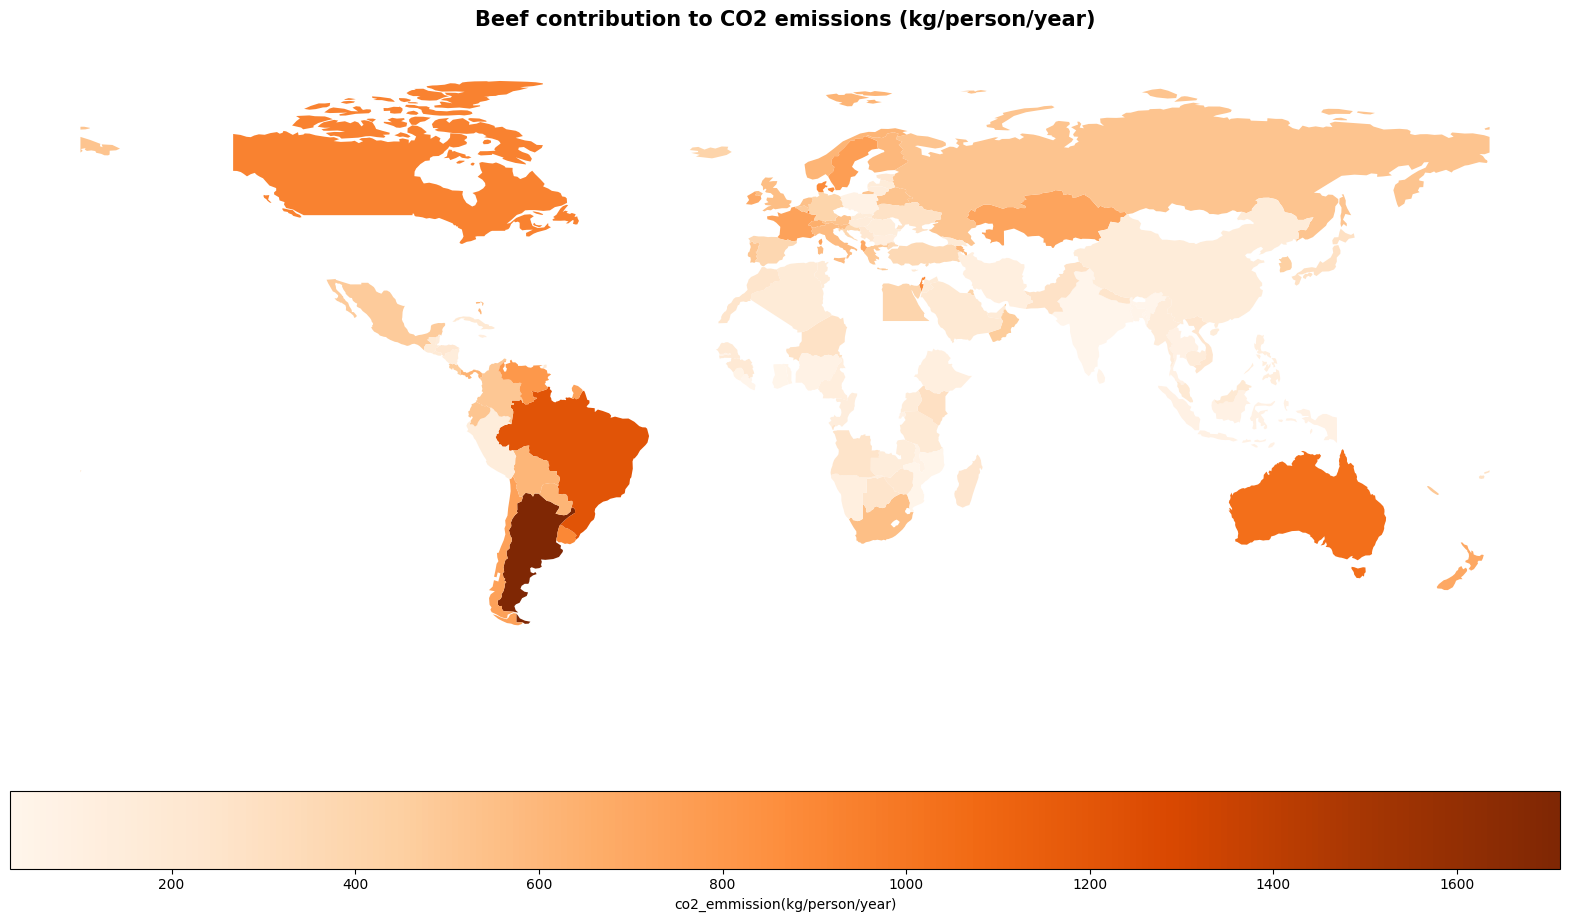

In [22]:
fig,ax = plt.subplots(1,1,figsize=(20,12))

beef_df.plot(column='co2_emmission',legend=True,legend_kwds={'label':'co2_emmission(kg/person/year)','orientation':'horizontal'},
             ax=ax,cmap='Oranges')
ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
plt.title('Beef contribution to CO2 emissions (kg/person/year)',pad=20,fontsize=15,fontweight='bold')
plt.savefig('beefmap.png')

A visualization of beef's emmission number across the world reveals highest contributing regions.


*   North and South America regions appear to be the highest contributing regions.
*   Australia also accounts for a huge chunk as well after the America regions.

*  Africa and the Middle East regions account for the least, with parts of Asia falling in this category as well.



**A box plot and interpretation of the CO2 contributions of food levels.**

In [23]:
ord = data.sort_values(by='co2_emmission',ascending=False)
ord.head()

,country,food_category,consumption,co2_emmission,food_type
2,Argentina,Beef,55.48,1712.00,Animal_Based
90,Brazil,Beef,39.25,1211.17,Animal_Based
57,USA,Beef,36.24,1118.29,Animal_Based
13,Australia,Beef,33.86,1044.85,Animal_Based
123,Bermuda,Beef,33.15,1022.94,Animal_Based


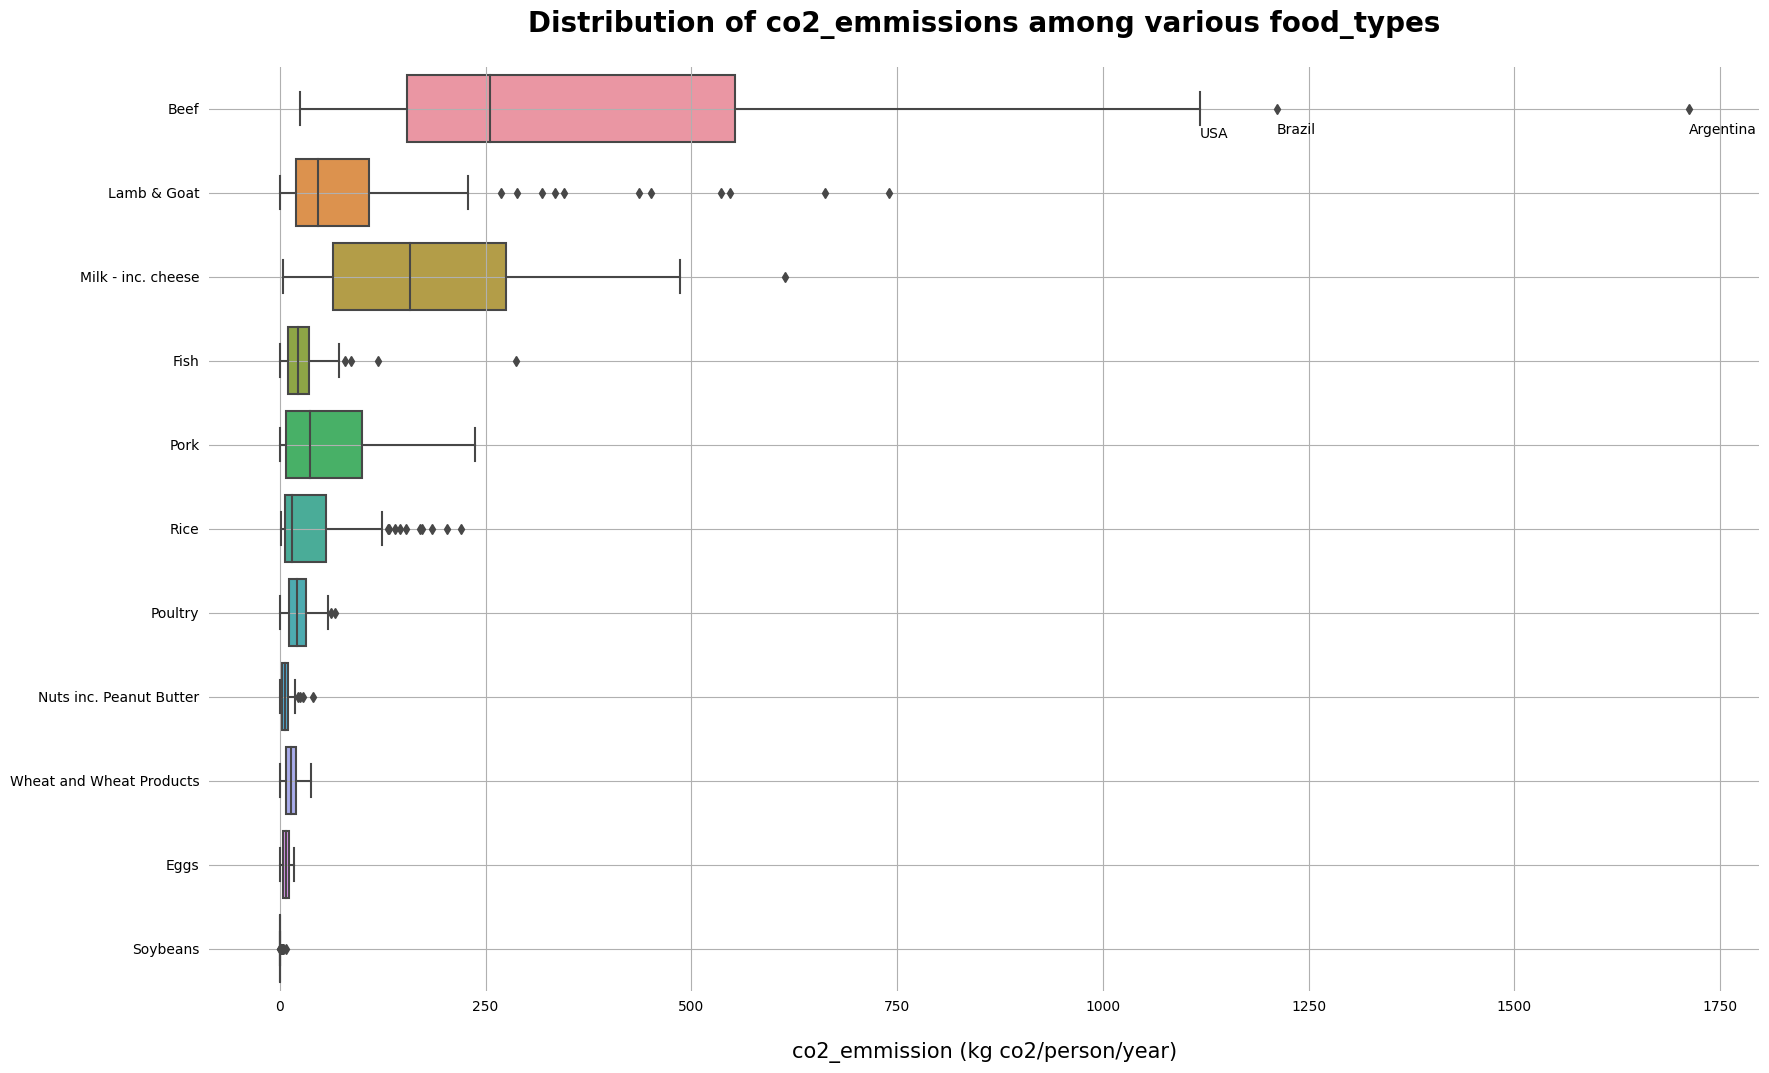

In [24]:
plt.figure(figsize=(20,12))
sns.boxplot(x=ord['co2_emmission'],y=ord['food_category'])
plt.tick_params(left=False,bottom=False)
plt.xlabel('co2_emmission (kg co2/person/year)',fontsize=15,labelpad=20)
plt.annotate('Brazil',xy=(1211.17,0.3))
plt.annotate('Argentina',xy=(1712,0.3))
plt.annotate('USA',xy=(1118.29,0.35))
plt.ylabel('')
plt.grid()
sns.despine(top=True,bottom=True,left=True,right=True)
plt.title('Distribution of co2_emmissions among various food_types',fontsize=20,weight='bold',pad=25)
plt.savefig('co2_emmissions_dist.png')

As expected, beef ranks the highest, with USA, Brazil and Argentina, all part of the America regions being the highest contributer to beef emmissions.

**Top 10 Countries with highest emissions. Choose the appropriate visual type**

In [25]:
top = data.groupby('country')[['co2_emmission']].sum().sort_values(by='co2_emmission',ascending=False).reset_index().head(10)
top

,country,co2_emmission
0,Argentina,2172.40
1,Australia,1938.66
2,Albania,1777.85
3,New Zealand,1750.95
4,Iceland,1731.36
5,USA,1718.86
6,Uruguay,1634.91
7,Brazil,1616.73
8,Luxembourg,1598.41
9,Kazakhstan,1575.08


**And how much beef emmissions contribute to that...**

In [26]:
beef = data.groupby(['country','food_category'])[['co2_emmission']].sum().reset_index()

In [27]:
beef = beef.query("food_category == 'Beef'")
beef

,country,food_category,co2_emmission
0,Albania,Beef,694.30
11,Algeria,Beef,172.80
22,Angola,Beef,259.82
33,Argentina,Beef,1712.00
44,Armenia,Beef,606.67
...,...,...,...
1375,Uruguay,Beef,897.96
1386,Venezuela,Beef,798.91
1397,Vietnam,Beef,229.58
1408,Zambia,Beef,146.88


In [28]:
fin_df = pd.merge(top,beef,on='country',how='left')
fin_df

,country,co2_emmission_x,food_category,co2_emmission_y
0,Argentina,2172.40,Beef,1712.00
1,Australia,1938.66,Beef,1044.85
2,Albania,1777.85,Beef,694.30
3,New Zealand,1750.95,Beef,693.99
4,Iceland,1731.36,Beef,412.26
5,USA,1718.86,Beef,1118.29
6,Uruguay,1634.91,Beef,897.96
7,Brazil,1616.73,Beef,1211.17
8,Luxembourg,1598.41,Beef,922.03
9,Kazakhstan,1575.08,Beef,721.46


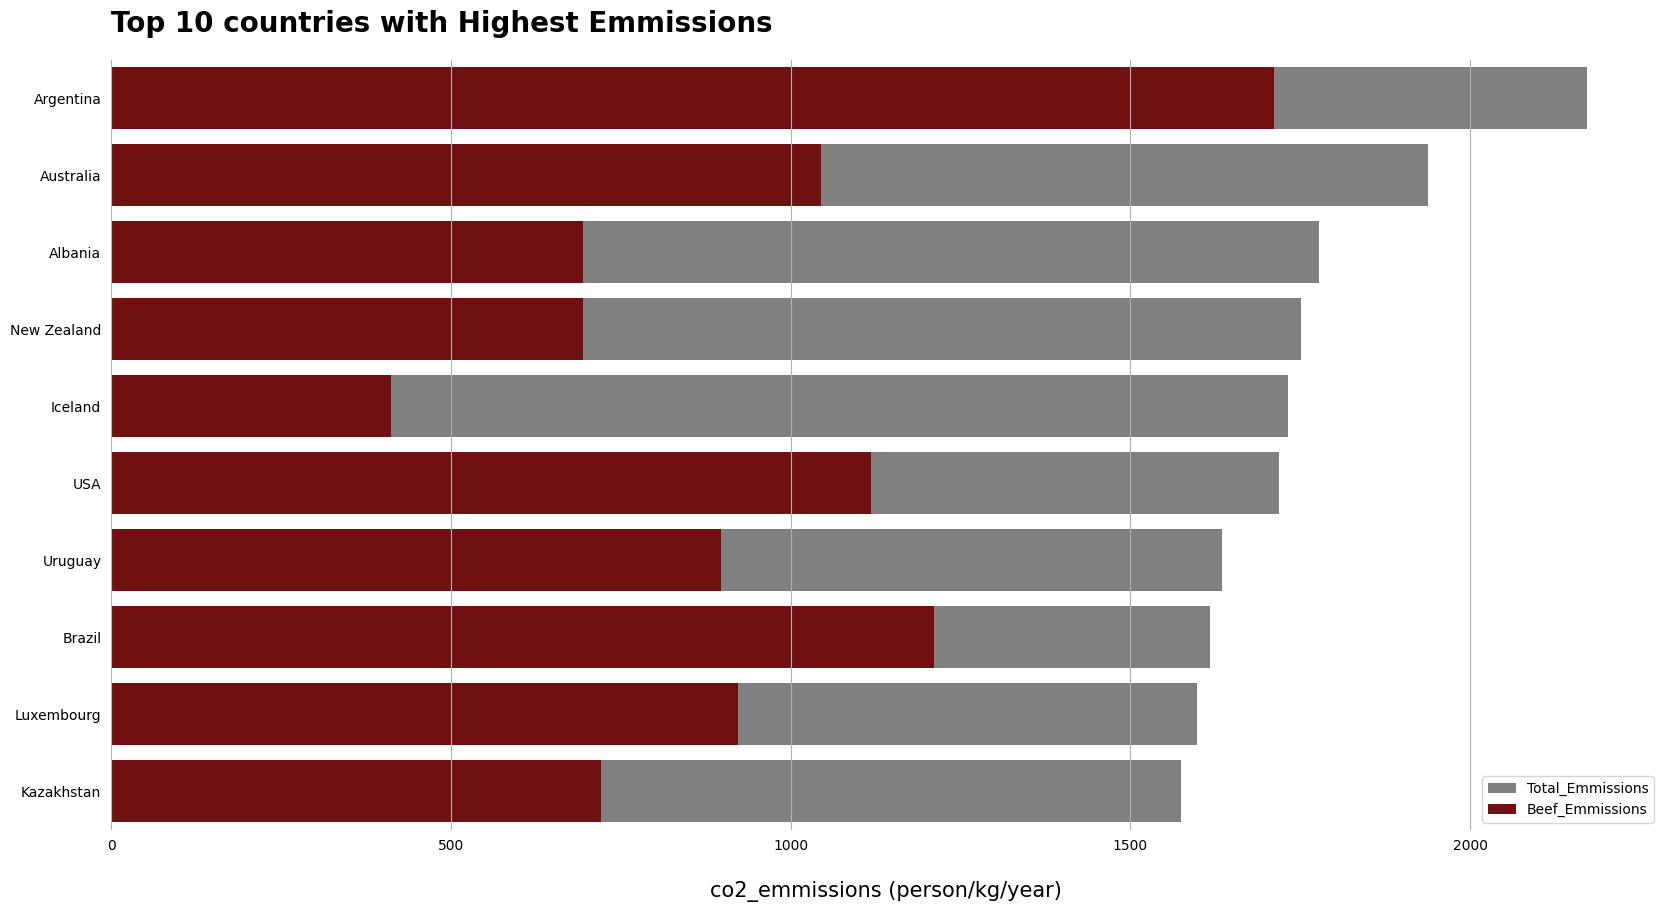

In [29]:
plt.figure(figsize=(20,10))
plt.grid(axis='x')
sns.barplot(data=fin_df,x='co2_emmission_x',y='country',color='grey',label='Total_Emmissions')
sns.barplot(data=fin_df,x='co2_emmission_y',y='country',color='maroon',label='Beef_Emmissions')
sns.despine(bottom=True,left=True)
plt.legend()
plt.tick_params(left=False,bottom=False)

plt.ylabel('')
plt.xlabel('co2_emmissions (person/kg/year)',labelpad=20,fontsize=15)
plt.title('Top 10 countries with Highest Emmissions',pad=20,fontweight='bold',loc='left',fontsize=20)
plt.savefig('Highest_Emm_Countries.png')

A closer look at the highest C02 emmissions per country reveals an interesting pattern when hued with beef emmissions.
It appears the that highest contributer in majority of this countries remains to be beef.